In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/data.csv').drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': -1})
df['diagnosis'].value_counts()

diagnosis
-1    357
 1    212
Name: count, dtype: int64

In [2]:
cols = []
for col in df.columns:
    cols.append(col)
cols.remove('diagnosis')
df[cols] = StandardScaler().fit_transform(df[cols])

X = df.drop(['diagnosis'], axis=1).to_numpy()
y = df['diagnosis'].to_numpy()
X.shape, y.shape

((569, 30), (569,))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def plot_margins(margins):
    plt.figure(figsize=(8, 4))
    plt.plot(margins, linestyle='-', color='black')
    plt.axhline(0, color='black')
    plt.ylabel("Отступ", fontsize=10)
    plt.fill_between(range(len(margins)), margins, 0, where=(margins > 0.3), color='green', label='Надежные (|M| > 0.3)')
    plt.fill_between(range(len(margins)), margins, 0, where=np.bitwise_and(margins >= -0.3, margins <= 0.3), color='yellow', 
                     label='Пограничные (-0.3 <= |M| <= 0.3)')
    plt.fill_between(range(len(margins)), margins, 0, where=(margins < -0.3), color='red', label='Шумовые (|M| < -0.3)')
    plt.legend()
    plt.show()

Все модели ниже реализуют SGD с моментами Нестерова, адаптивным шагом обучения, L2 регуляризацией и рекуррентной оценкой функционала качества. Согласно заданию, отличаются способы иницализации весов и порядок предъявления объектов.

Обучение с инициализацией весов через корреляцию:

Время: 0.02 сек.
Accuracy: 0.96


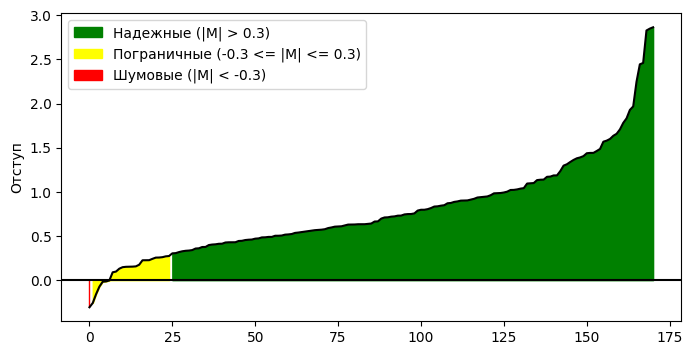

In [5]:
from time import time
from LinearClassifier import LinearClassifier
from sklearn.metrics import accuracy_score

start = time()
model = LinearClassifier(weights_init_method="correlation", reg_coef=0.0001, lambd=0.01, gamma=0.09,
                         obj_presentation="random", epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy, 2)}')
margins = np.sort(model.margin(X_test, y_test))
plot_margins(margins)

Обучение c инициализацией весов через мультистарт:

Время: 0.11 сек.
Accuracy: 0.98


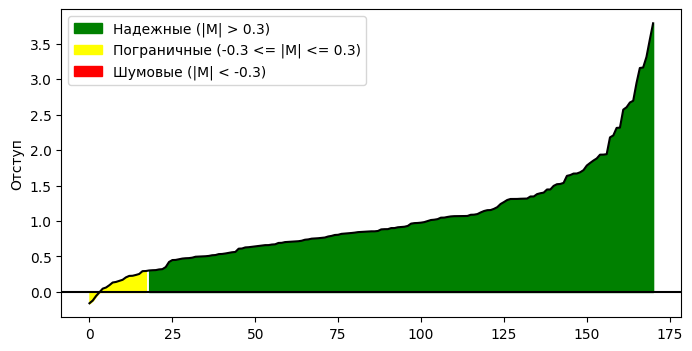

In [6]:
start = time()
model = LinearClassifier(weights_init_method="multistart", reg_coef=0.0001, lambd=0.01, gamma=0.09,
                         obj_presentation="margin_abs", epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy, 2)}')
margins = np.sort(model.margin(X_test, y_test))
plot_margins(margins)

Обучение со случайным предъявлением объектов:

Время: 0.03 сек.
Accuracy: 0.96


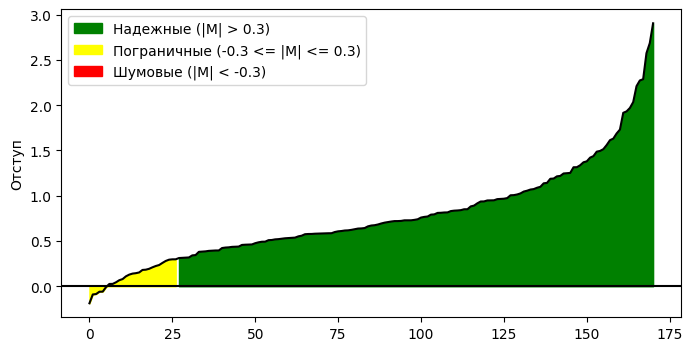

In [7]:
start = time()
model = LinearClassifier(weights_init_method="default", reg_coef=0.0001, lambd=0.01, gamma=0.09,
                         obj_presentation="random", epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy, 2)}')
margins = np.sort(model.margin(X_test, y_test))
plot_margins(margins)

Обучение с предъявлением объектов по модулю отступа:

Время: 0.07 сек.
Accuracy: 0.98


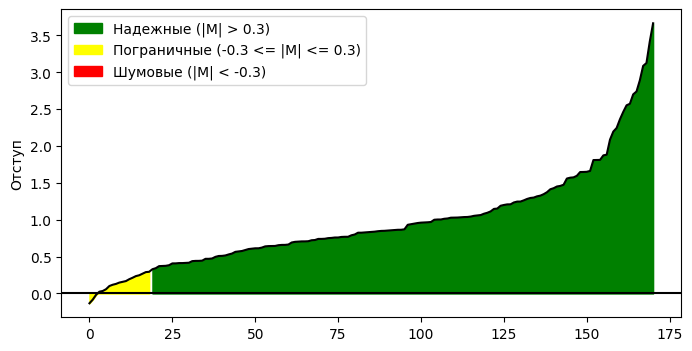

In [16]:
start = time()
model = LinearClassifier(weights_init_method="default", reg_coef=0.0001, lambd=0.01, gamma=0.09,
                         obj_presentation="margin_abs", epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy, 2)}')
margins = np.sort(model.margin(X_test, y_test))
plot_margins(margins)

Лучшая реализация - с инициализированными мультистартом весами и предъявлением объектов по |M|:

Время: 0.07 сек.
Accuracy: 0.99


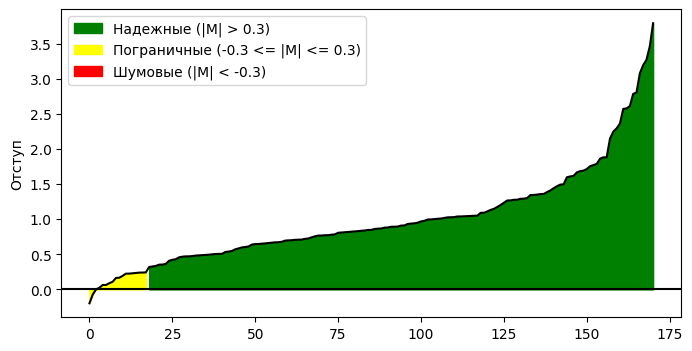

In [19]:
start = time()
model = LinearClassifier(weights_init_method="multistart", reg_coef=0.0001, lambd=0.01, gamma=0.09,
                         obj_presentation="margin_abs", epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy, 2)}')
margins = np.sort(model.margin(X_test, y_test))
plot_margins(margins)

Эталонная реализация sklearn:

In [9]:
from sklearn.linear_model import SGDClassifier

start = time()
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Время: {time()-start:.3f} сек.\nAccuracy: {accuracy:.2f}')

Время: 0.004 сек.
Accuracy: 0.97
